# Plotting

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ElementsOfDataScience/blob/master/06_plotting.ipynb) or
[click here to download it](https://github.com/AllenDowney/ElementsOfDataScience/raw/master/06_plotting.ipynb).

This chapter presents ways to create figures and graphs, more generally called **data visualizations**.  As examples, we'll generate three figures:

* We'll replicate a figure from the Pew Research Center that shows changes in religious affiliation in the U.S. over time.

* We'll replicate the figure from *The Economist* that shows the prices of sandwiches in Boston and London (we saw this data back in Chapter 3).

* We'll make a plot to test Zipf's law, which describes the relationship between word frequencies and their ranks.

With the tools in this chapter, you can generate a variety of simple graphs.  We will see more visualization tools in later chapters.
But before we get started with plotting, we need a new language feature: keyword arguments.

## Keyword Arguments

When you call most functions, you have to provide values.  For example, when you call `np.exp`, which raises $e$ to a given power, the value you provide is a number: 

In [1]:
import numpy as np

np.exp(1)

2.718281828459045

When you call `np.power`, you have to provide two numbers:

In [3]:
np.power(10, 6)

1000000

The values you provide are called **arguments**.  Specifically, the values in these examples are **positional arguments** because their position determines how they are used.
In the second example, `power` computes `10` to the sixth power, not `6` to the 10th power because of the order of the arguments.

Many functions also take **keyword arguments**, which are identified by name.  For example, we have previously used `int` to convert a string to an integer.
Here's how we use it with a string as a positional argument:

In [4]:
int('21')

21

By default, `int` assumes that the number is in base 10.  But you can provide a keyword argument that specifies a different base.
For example, the string `'21'`, interpreted in base 8, represents the number `2 * 8 + 1 = 17`.  Here's how we do this conversion using `int`.

In [5]:
int('21', base=8)

17

The integer value `8` is a keyword argument, with the keyword `base`.

Specifying a keyword argument looks like an assignment statement, but it does not create a new variable.
And when you specify a keyword argument, you don't choose the variable name.  In this example, the keyword name, `base`, is part of the definition of `int`.  If you specify another keyword name, you get an error.

Run the following line in the next cell to see what happens.

```
int('123', bass=11)
```

In [7]:
# int('123', bass=11)

**Exercise:** The `print` function takes a keyword argument called `end` that specifies the character it prints at the end of the line.  By default, `end` is the newline character, `\n`.  So if you call `print` more than once, the results normally appear on separate lines, like this:

In [46]:
for x in [1, 2, 3]:
    print(x)

Modify the previous example so it prints the elements of the list, all on one line, with spaces between them.
Then modify it to print an open bracket at the beginning and a close bracket and newline at the end.

In [10]:
for x in [1, 2, 3]:
    print(x, end=' ')

1 2 3 

In [14]:
print('[', end=' ')
for x in [1, 2, 3]:
    print(x, end=' ')
print(']')

[ 1 2 3 ]


In [11]:
for x in [1, 2, 3]:
    print(f'[{x}]')

[1]
[2]
[3]


## Graphing Religious Affiliation

Now we're ready to make some graphs.
In October 2019 the Pew Research Center published "In U.S., Decline of Christianity Continues at Rapid Pace" at <https://www.pewresearch.org/religion/2019/10/17/in-u-s-decline-of-christianity-continues-at-rapid-pace/>.
It includes this figure, which shows changes in religious affiliation among adults in the U.S. over the previous 10 years.

<img src="https://github.com/AllenDowney/ElementsOfDataScience/raw/master/figs/pew_religion_figure1.png" width="400">

As an exercise, we'll replicate this figure.  It shows results from two sources, Religious Landscape Studies and Pew Research Political Surveys.  The political surveys provide data from more years, so we'll focus on that.

The data from the figure are available from Pew Research at <https://www.pewforum.org/wp-content/uploads/sites/7/2019/10/Detailed-Tables-v1-FOR-WEB.pdf>, but they are in a PDF document.  It is sometimes possible to extract data from PDF documents, but for now we'll enter the data by hand.

In [16]:
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

christian = [77, 76, 75, 73, 73, 71, 69, 68, 67, 65]

unaffiliated = [17, 17, 19, 19, 20, 21, 24, 23, 25, 26]

The library we'll use for plotting is Matplotlib; more specifically, we'll use a part of it called Pyplot, which we'll import with the nickname `plt`.

In [17]:
import matplotlib.pyplot as plt

Pyplot provides a function called `plot` that makes a line plot.  It takes two sequences as arguments, the `x` values and the `y` values.  The sequences can be tuples, lists, or arrays.

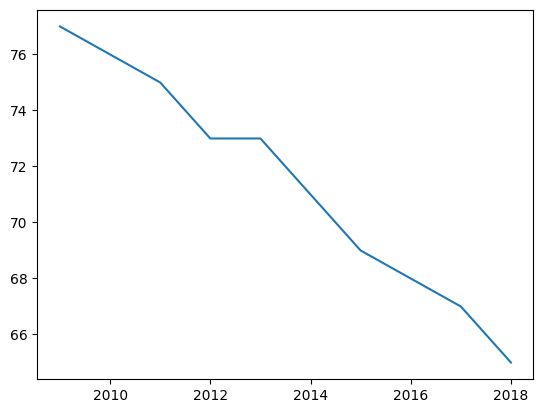

In [20]:
plt.plot(year, christian);

The semi-colon at the end of the line prevents the return value from `plot`, which is an object representing the line, from being displayed.

If you plot multiple lines in a single cell, they appear on the same axes.

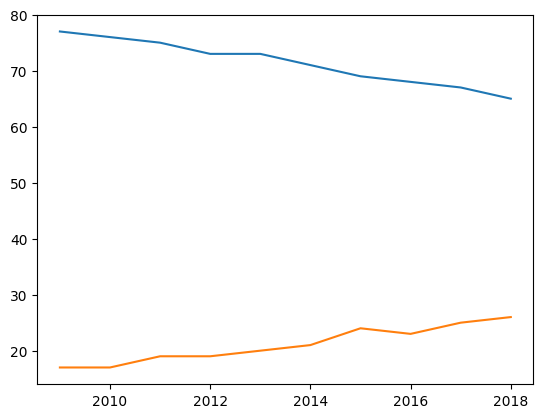

In [21]:
plt.plot(year, christian)
plt.plot(year, unaffiliated);

Plotting them on the same axes makes it possible to compare them directly.
However, notice that Pyplot chooses the range for the axes automatically; in this example the `y` axis starts around 15, not zero.

As a result, it provides a misleading picture, making the ratio of the two lines look bigger than it really is.
We can set the limits of the `y` axis using the function `plt.ylim`.  The argument is a list with two values, the lower bound and the upper bound.

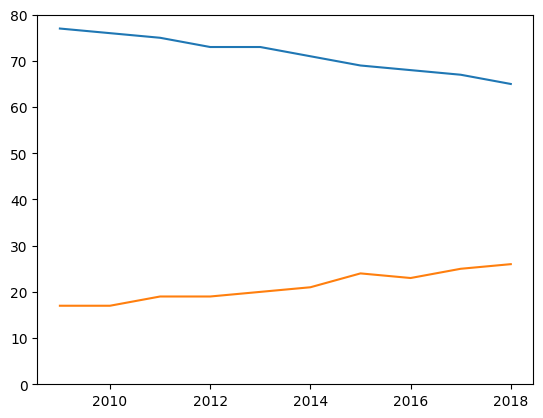

In [26]:
plt.plot(year, christian)
plt.plot(year, unaffiliated)

plt.ylim([0, 80])
plt;

That's better, but this graph is missing some of the most important elements: labels for the axes and a title.  

## Decorating the Axes

To label the axes and add a title, we'll use Pyplot functions `xlabel`, `ylabel`, and `title`.  All of them take strings as arguments.

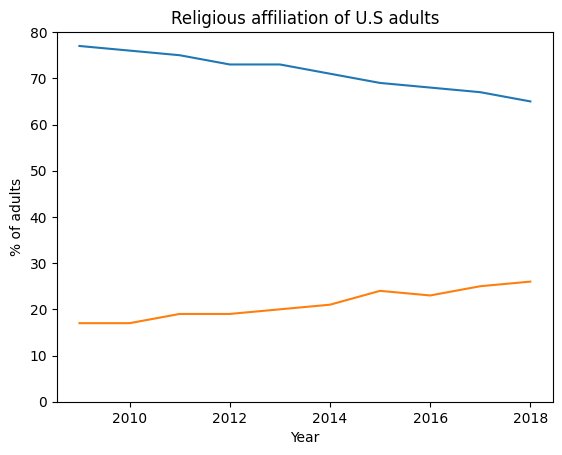

In [27]:
plt.plot(year, christian)
plt.plot(year, unaffiliated)

plt.ylim([0, 80])
plt.xlabel('Year')
plt.ylabel('% of adults')
plt.title('Religious affiliation of U.S adults');

Now let's add another important element, a legend that indicates which line is which.
To do that, we add a label to each line, using the keyword argument `label`.
Then we call `plt.legend` to create the legend.

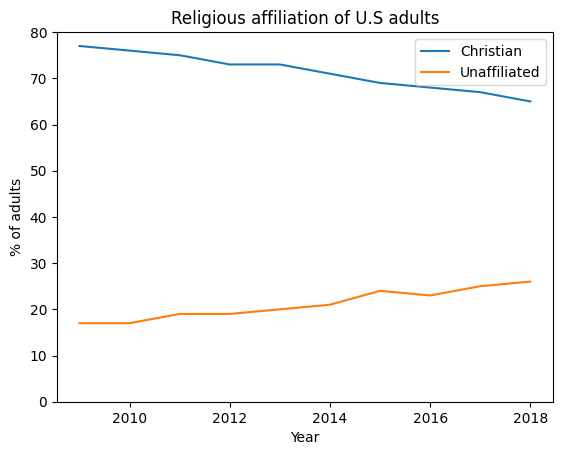

In [31]:
plt.plot(year, christian, label='Christian')
plt.plot(year, unaffiliated, label='Unaffiliated')

plt.ylim([0, 80])
plt.xlabel('Year')
plt.ylabel('% of adults')
plt.title('Religious affiliation of U.S adults')
plt.legend()
plt;

The legend shows the labels we provided when we created the lines.

**Exercise:** The original figure plots lines between the data points, but it also plots markers showing the location of each data point.  It is generally good practice to include markers, especially if data are not available for every year.

Modify the previous example to include a keyword argument `marker` with the string value `'o'`, which indicates that you want to plot circles as markers.

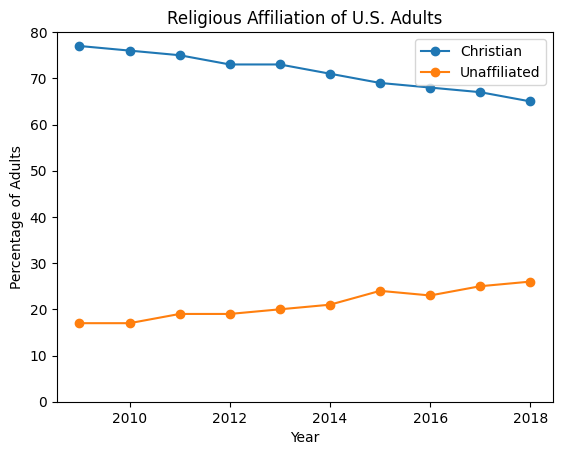

In [47]:
plt.plot(year, christian, label='Christian', marker='o')
plt.plot(year, unaffiliated, label='Unaffiliated', marker='o')

plt.ylim((0, 80))

plt.title('Religious Affiliation of U.S. Adults')
plt.xlabel('Year')
plt.ylabel('Percentage of Adults')
plt.legend()

plt;

**Exercise:** In the original figure, the line labeled `'Christian'` is red and the line labeled `'Unaffiliated'` is grey.

Find the online documentation of `plt.plot` and figure out how to use keyword arguments to specify colors.  Choose colors to (roughly) match the original figure.

The `legend` function takes a keyword argument that specifies the location of the legend.  Read the documentation of this function and move the legend to the center left of the figure.

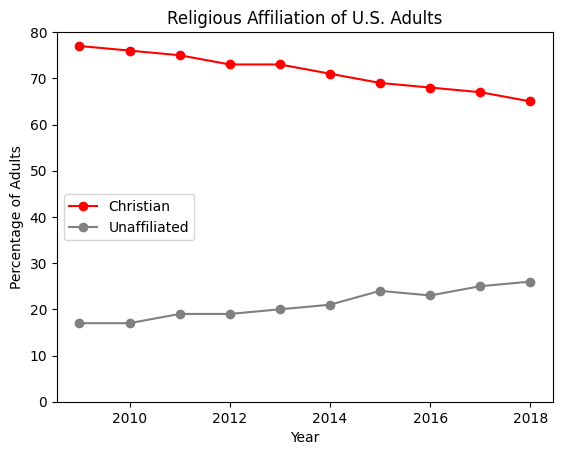

In [56]:
plt.plot(year, christian, label='Christian', marker='o', color='red')
plt.plot(year, unaffiliated, label='Unaffiliated', marker='o', color='grey')

plt.ylim((0, 80))

plt.title('Religious Affiliation of U.S. Adults')
plt.xlabel('Year')
plt.ylabel('Percentage of Adults')
plt.legend(loc=6)

plt;

## Plotting Sandwich Prices

In Chapter 3 we used data from an article in *The Economist* comparing sandwich prices in Boston and London: "Why Americans pay more for lunch than Britons do" at <https://www.economist.com/finance-and-economics/2019/09/07/why-americans-pay-more-for-lunch-than-britons-do>.

The article includes this graph showing prices of several sandwiches in the two cities:

<img src="https://github.com/AllenDowney/ElementsOfDataScience/raw/master/figs/20190907_FNC941.png"  width="400">

As an exercise, let's see if we can replicate this figure.
Here's the data from the article again: the names of the sandwiches and the price list for each city.

In [57]:
name_list = [
    'Lobster roll',
    'Chicken caesar',
    'Bang bang chicken',
    'Ham and cheese',
    'Tuna and cucumber',
    'Egg'
]

boston_price_list = [9.99, 7.99, 7.49, 7, 6.29, 4.99]
london_price_list = [7.5, 5, 4.4, 5, 3.75, 2.25]

In the previous section we plotted percentages on the `y` axis versus time on the `x` axis.
Now we want to plot the sandwich names on the `y` axis and the prices on the `x` axis.
Here's how:

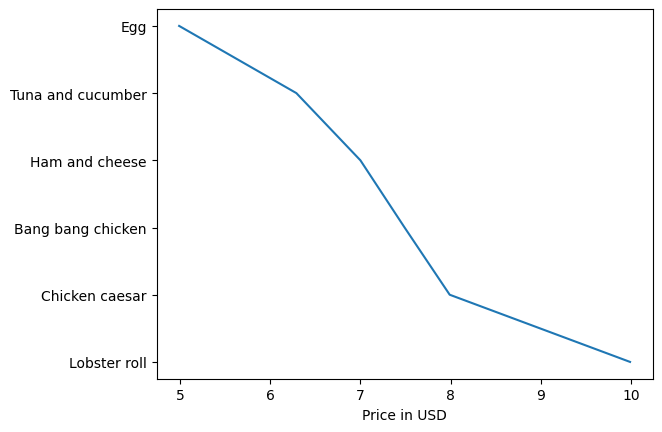

In [58]:
plt.plot(boston_price_list, name_list)
plt.xlabel('Price in USD');

`name_list` is a list of strings; Pyplot orders them from top to bottom, equally spaced.

By default Pyplot connects the points with lines, but in this example the lines don't make sense because the sandwich names are discrete; there are no intermediate points between an egg sandwich and a tuna sandwich.

We can turn on markers and turn off lines with keyword arguments.

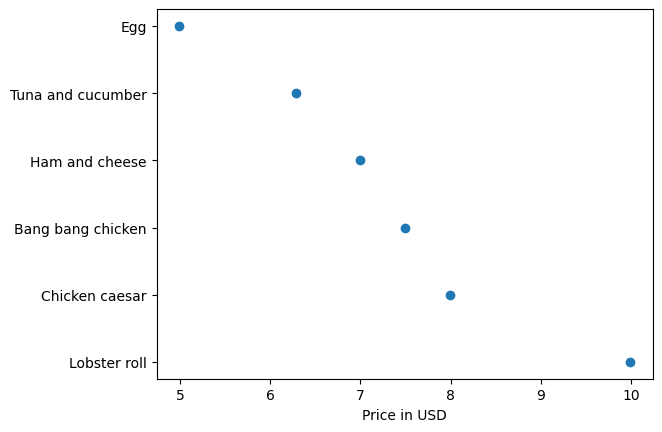

In [59]:
plt.plot(boston_price_list, name_list, 
         marker='o', linestyle='')
plt.xlabel('Price in USD');

Or we can do the same thing more concisely by providing a **format string** as a positional argument.
In this example, `'o'` indicates a circle marker and `'s'` indicates a square.
You can read the documentation of `plt.plot` to learn more about format strings.

And let's add a title while we're at it:

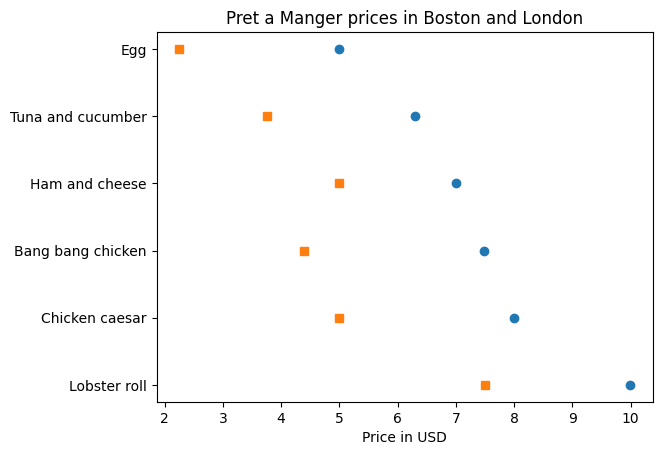

In [60]:
plt.plot(boston_price_list, name_list, 'o')
plt.plot(london_price_list, name_list, 's')

plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London');

Now, to approximate the colors in the original figure, we can use the strings `'C3'` and `'C0'`, which specify colors from the default color sequence.  You can read more about specifying colors in the Pyplot documentation: <https://matplotlib.org/3.1.1/tutorials/colors/colors.html>.

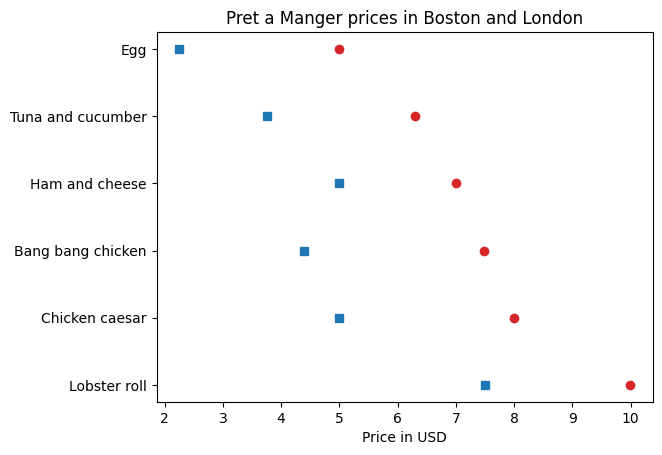

In [61]:
plt.plot(boston_price_list, name_list, 'o', color='C3')
plt.plot(london_price_list, name_list, 's', color='C0')

plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London');

To connect the dots with lines, we'll use `plt.hlines`, which draws horizontal lines.  It takes three arguments: a sequence of values on the `y` axis, which are the sandwich names in this example, and two sequences of values on the `x` axis, which are the London prices and Boston prices.

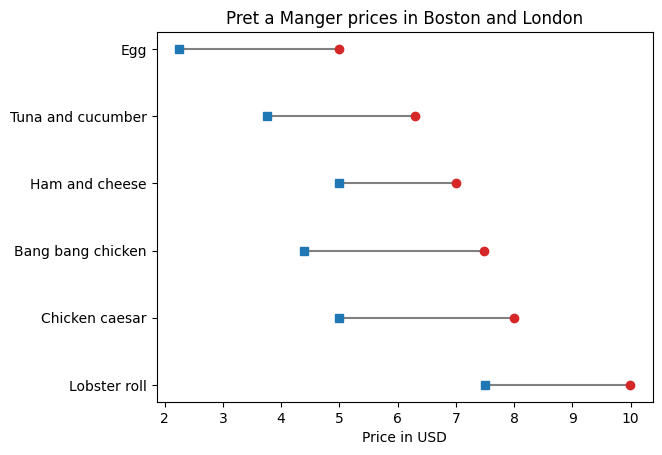

In [64]:
plt.hlines(name_list, london_price_list, boston_price_list, color='gray')

plt.plot(boston_price_list, name_list, 'o', color='C3')
plt.plot(london_price_list, name_list, 's', color='C0')

plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London');

**Exercise:** To finish off this example, add a legend that identifies the London and Boston prices.  Remember that you have to add a `label` keyword each time you call `plt.plot`, and then call `plt.legend`.

Notice that the sandwiches in our figure are in the opposite order of the sandwiches in the original figure.  There is a Pyplot function that inverts the `y` axis; see if you can find it and use it to reverse the order of the sandwich list.

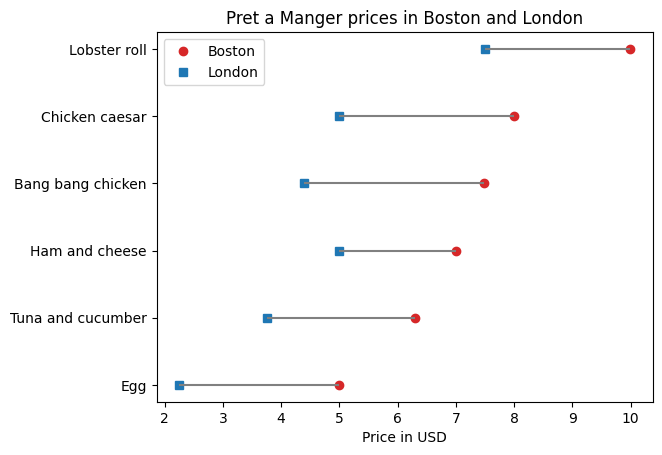

In [75]:
plt.plot(boston_price_list, name_list, 'o', c='C3', label='Boston')
plt.plot(london_price_list, name_list, 's', c='C0', label='London')
plt.hlines(name_list, boston_price_list, london_price_list, color='gray')

plt.gca().invert_yaxis()

plt.legend()
plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London')

plt;

## Zipf's Law

In almost any book, in almost any language, if you count the number of unique words the the number of times each word appears, you will find a remarkable pattern: the most common word appears twice as often as the second most common, at least approximately, three times as often as the third most common, and so on.

In general, if we sort the words in descending order of frequency, there is an inverse relationship between the rank of the words -- first, second, third, etc. -- and the number of times they appear.
This observation was most famously made by George Kingsley Zipf, so it is called Zipf's law.

To see if this law holds for the words in *War and Peace*, we'll make a Zipf plot, which shows:

* The frequency of each word on the `y` axis, and

* The rank of each word on the `x` axis, starting from 1.

First, let's download the book again.  
When you run the following cell, it checks to see whether you already have a file named `2600-0.txt`, which is the name of the file that contains the text of *War and Peace*.
If not, it copies the file from Project Gutenberg to your computer.  

In [64]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://www.gutenberg.org/files/2600/2600-0.txt')

In the previous chapter, we looped through the book and made a string that contains all punctuation characters.
Here are the results, which we will need again.

In [65]:
all_punctuation = ',.-:[#]*/“’—‘!?”;()%@'

The following code loops through the book and makes a dictionary that maps from each word to the number of times it appears.

In [ ]:
# On Windows, it might be necessary to specify the encoding 

# fp = open('2600-0.txt', encoding='utf-8')

In [66]:
first_line = "CHAPTER I\n"
last_line = "*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***\n"

fp = open('2600-0.txt')
for line in fp:
    if line == first_line:
        break

unique_words = {}
for line in fp:
    if line == last_line:
        break
        
    for word in line.split():
        word = word.lower()
        word = word.strip(all_punctuation)
        if word in unique_words:
            unique_words[word] += 1
        else:
            unique_words[word] = 1

In `unique_words`, the keys are words and the values are their frequencies.  We can use the `values` function to get the values from the dictionary.  The result has the type `dict_values`: 

In [67]:
freqs = unique_words.values()
type(freqs)

Before we plot them, we have to sort them, but the `sort` function doesn't work with `dict_values`.

Try this to see what happens:

```
freqs.sort()
```

We can use `list` to make a list of frequencies:

In [68]:
freqs = list(unique_words.values())
type(freqs)

And now we can use `sort`.  By default it sorts in ascending order, but we can pass a keyword argument to reverse the order.

In [69]:
freqs.sort(reverse=True)

Now, for the ranks, we need a sequence that counts from 1 to `n`, where `n` is the number of elements in `freqs`.  We can use the `range` function, which returns a value with type `range`.

As a small example, here's the range from 1 to 5.

In [70]:
range(1, 5)

However, there's a catch.  If we use the range to make a list, we see that "the range from 1 to 5" includes 1, but it doesn't include 5.

In [71]:
list(range(1, 5))

That might seem strange, but it is often more convenient to use `range` when it is defined this way, rather than what might seem like the more natural way (see <https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html>).
Anyway, we can get what we want by increasing the second argument by one:

In [72]:
list(range(1, 6))

So, finally, we can make a range that represents the ranks from `1` to `n`:

In [73]:
n = len(freqs)
ranks = range(1, n+1)
ranks

And now we can plot the frequencies versus the ranks:

In [74]:
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law");

The few most common words are very common, but the great majority of words are rare.  So that's consistent with Zipf's law, but Zipf's law is more specific.  It claims that the frequencies should be inversely proportional to the ranks.  If that's true, we can write:

$f = k / r$

where $r$ is the rank of a word, $f$ is its frequency, and $k$ is an unknown constant of proportionality.  If we take the log of both sides, we get

$\log f = \log k - \log r$

This equation implies that if we plot $f$ versus $r$ on a log-log scale, we expect to see a straight line with intercept at $\log k$ and slope -1.

## Logarithmic Scales

We can use `plt.xscale` to plot the `x` axis on a log scale.

In [75]:
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law")
plt.xscale('log')

And `plt.yscale` to plot the `y` axis on a log scale.

In [76]:
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law")
plt.xscale('log')
plt.yscale('log')

The result is not quite a straight line, but it is close.  We can get a sense of the slope by connecting the end points with a line.
We'll select the first and last elements from `xs`.

In [77]:
xs = ranks[0], ranks[-1]
xs

And the first and last elements from `ys`.

In [78]:
ys = freqs[0], freqs[-1]
ys

And plot a line between them.

In [79]:
plt.plot(xs, ys, color='gray')
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law")
plt.xscale('log')
plt.yscale('log')

The slope of this line is the "rise over run", that is, the difference on the `y` axis divided by the difference on the `x` axis.

We can compute the rise using `np.log10` to compute the log base 10 of the first and last values:

In [41]:
np.log10(ys)

Then we can use `np.diff` to compute the difference between the elements:

In [42]:
rise = np.diff(np.log10(ys))
rise

In the following exercise, you'll compute the run and the slope of the gray line.

**Exercise:** Use `log10` and `diff` to compute the run, that is, the difference on the `x` axis.  Then divide the rise by the run to get the slope of the grey line.
Is it close to -1, as Zipf's law predicts?

In [43]:
# Solution goes here

In [44]:
# Solution goes here

## Summary

This chapter introduces the Matplotlib library, which we used to replicate two figures a Zipf plot.
These examples demonstrate the most common elements of data visualization, including lines and markers, values and labels on the axes, a legend and a title.
The Zipf plot also shows the power of plotting data on logarithmic scales.

*Elements of Data Science*

Copyright 2021 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)